In [1]:
import tweepy as tw
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
import re

from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import defaultdict
from collections import  Counter
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download(['stopwords', 'punkt', 'names', 'vader_lexicon'] )
plt.style.use('ggplot')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\juanp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\juanp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package names to
[nltk_data]     C:\Users\juanp\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\juanp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Setup

## Setup API

In [2]:
API_KEY = 'LoiVW76XekU31dGeTzRF3jaRn'
API_KEY_SECRET = 'zMI3E52t5DHPvlBEcq033ZcvzSXwudxOZbgWflDXaNiM29gHXG'
ACCESS_TOKEN = 'AAAAAAAAAAAAAAAAAAAAALiigwEAAAAAQL5JJp3%2BeOebr2JSQERPsx0D6b0%3Di0YCX9UIE8WQRbnyohpKwy9V4k7XCRrXXT3bfqymxQbxPMv7Tb'

In [3]:
auth = tw.OAuthHandler(API_KEY, API_KEY_SECRET)
api = tw.API(auth, wait_on_rate_limit=True)

## Get Tweets

In [4]:
search_query = "#AppleEvent -filter:retweets"

In [5]:
# get tweets from the API
tweets = tw.Cursor(api.search_tweets,
              q=search_query,
              lang="en",
              since="2022-09-07").items(500)
# store the API responses in a list
tweets_copy = []
for tweet in tweets:
    tweets_copy.append(tweet)
    
print("Total Tweets fetched:", len(tweets_copy))

Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter

Total Tweets fetched: 500


## DataFrame

In [6]:
import pandas as pd

# intialize the dataframe
tweets_df = pd.DataFrame()

# populate the dataframe
for tweet in tweets_copy:
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({'user_name': tweet.user.name, 
                                               'user_location': tweet.user.location,\
                                               'user_description': tweet.user.description,
                                               'user_verified': tweet.user.verified,
                                               'date': tweet.created_at,
                                               'text': text, 
                                               'hashtags': [hashtags if hashtags else None],
                                               'source': tweet.source}))
    tweets_df = tweets_df.reset_index(drop=True)

# show the dataframe
tweets_df.head()

C:\Users\juanp\AppData\Local\Temp\ipykernel_23000\1717546899.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tweets_df = tweets_df.append(pd.DataFrame({'user_name': tweet.user.name,


,user_name,user_location,user_description,user_verified,date,text,hashtags,source
0,zaks,"Toulouse, France",Livraison rapide beuh🍁shit🍫cock💉exta💊pour la F...,False,2022-09-14 23:25:20+00:00,#100devs #codinglife #HTML #CSS #javascript #D...,"[100devs, codinglife, HTML, CSS, javascript, D...",Twitter for Android
1,Goospery,,Goospery,False,2022-09-14 23:13:02+00:00,Always keep your cards and iPhone 14 Pro \n\n#...,"[iphone14pro, DynamicIsland, phonecase, AppleE...",Buffer
2,YKIBAE ꒰ᐢ • ˕ • ᐢ꒱,s o m e w h e r e,960206 est.,False,2022-09-14 23:07:35+00:00,@Apple funny but not funny haha how my back to...,None,Twitter for iPhone
3,GersonPlayzYT,idk,Subscribe to GersonPlayzYT!,False,2022-09-14 22:44:49+00:00,Is it just me or the first words of the traile...,"[Apple, AppleEvent]",Twitter for iPhone
4,NestedFolders,,A #productivity #podcast by @heyscottyj and @R...,False,2022-09-14 22:35:55+00:00,A HUGE exclusive episode for #Unnested support...,[Unnested],Tweetbot for iΟS


In [7]:
tweets_df.shape

(500, 8)

# Analisis Exploratorio (pre-limpieza)

### Cantidad de caracteres en el tweet

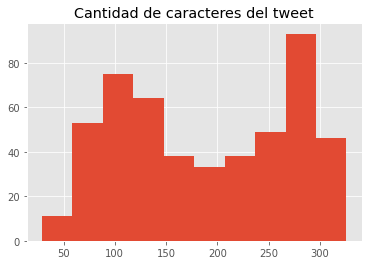

In [8]:
tweet_length = tweets_df['text'].str.len()
plt.hist(tweet_length)
plt.title('Cantidad de caracteres del tweet')
plt.show()

### Cantidad de palabras en el tweet

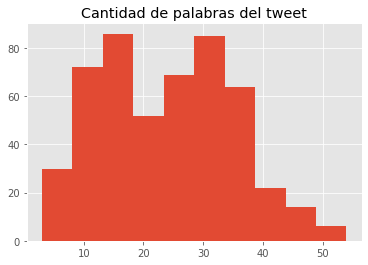

In [9]:
tweet_length = tweets_df['text'].str.split().map(lambda x: len(x))
plt.hist(tweet_length)
plt.title('Cantidad de palabras del tweet')
plt.show()

### Promedio de longitud de las palabras

c:\Users\juanp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='text', ylabel='Density'>

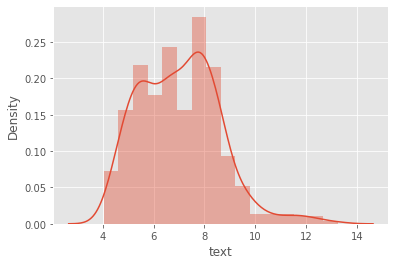

In [10]:
word=tweets_df['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)))

In [11]:
def create_corpus(target):
    corpus=[]
    
    for x in tweets_df['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

### Stopwords

In [12]:
corpus=create_corpus(0)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 

<BarContainer object of 10 artists>

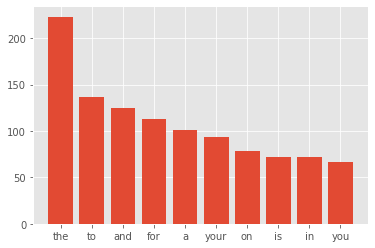

In [13]:
x,y=zip(*top)
plt.bar(x,y)

### Puntuacion

In [14]:
plt.figure(figsize=(10,5))
corpus=create_corpus(1)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

<Figure size 720x360 with 0 Axes>

<BarContainer object of 12 artists>

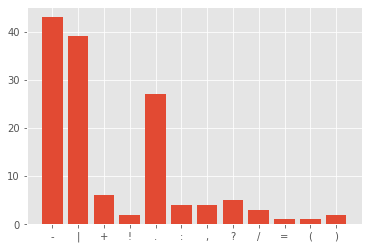

In [15]:
x,y=zip(*dic.items())
plt.bar(x,y)

### Palabras comunes

<AxesSubplot:>

c:\Users\juanp\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 128138 (\N{PILL}) missing from current font.
  func(*args, **kwargs)
c:\Users\juanp\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128138 (\N{PILL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


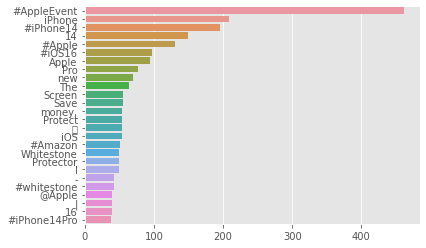

In [16]:
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

### Analisis ngramas

#### Bigrama

In [17]:
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<AxesSubplot:>

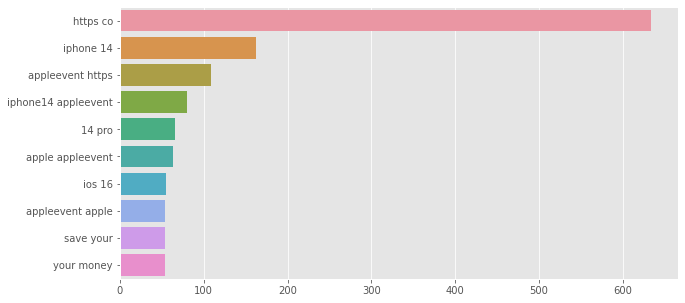

In [18]:
plt.figure(figsize=(10,5))
top_tweet_bigrams=get_top_tweet_bigrams(tweets_df['text'])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

### Trigrama

In [19]:
def get_top_tweet_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<AxesSubplot:>

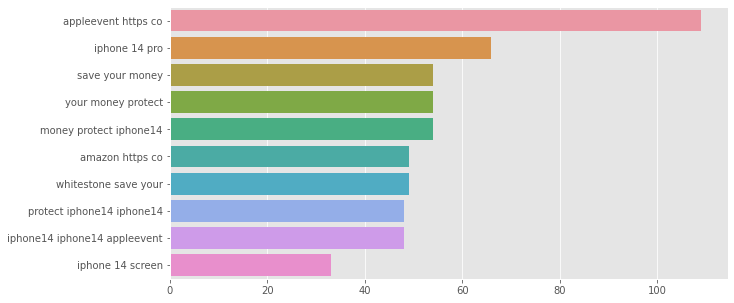

In [20]:
plt.figure(figsize=(10,5))
top_tweet_trigrams=get_top_tweet_trigrams(tweets_df['text'])[:10]
x,y=map(list,zip(*top_tweet_trigrams))
sns.barplot(x=y,y=x)

# Limpieza de los datos

### Quitar URLs

In [21]:
def remove_URL(text):
  url = re.compile(r'https?://\S+|www\.\S+')
  return url.sub(r'', text)

In [22]:
tweets_df['text'] = tweets_df['text'].apply(lambda x : remove_URL(x))

### Quitar tags HTML

In [23]:
def remove_HTML(text):
  html = re.compile(r'<.*?>')
  return html.sub(r'', text)

In [24]:
tweets_df['text'] = tweets_df['text'].apply(lambda x : remove_HTML(x))

### Quitar emojis

In [25]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [26]:
tweets_df['text'] = tweets_df['text'].apply(lambda x : remove_emoji(x))

### Quitar puntuacion

In [27]:
def remove_point(text):
  table = str.maketrans('', '', string.punctuation)
  return text.translate(table)

In [47]:
tweets_df['text'] = tweets_df['text'].apply(lambda x : remove_point(x))

## Quitar duplicados 

In [78]:
print('len 1', len(tweets_df))
tweets_df.drop_duplicates(subset=['text', 'user_name'], inplace=True)
print('len 2', len(tweets_df))

len 1 427
len 2 427


# Analisis post limpieza

### Caracteres

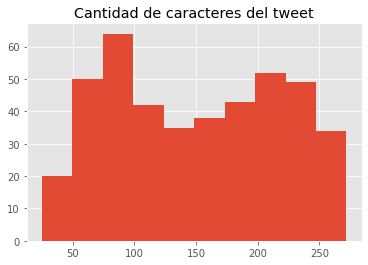

In [49]:
tweet_length = tweets_df['text'].str.len()
plt.hist(tweet_length)
plt.title('Cantidad de caracteres del tweet')
plt.show()

### Palabras

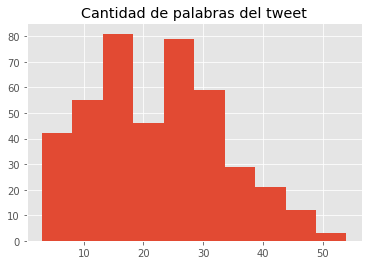

In [50]:
tweet_length = tweets_df['text'].str.split().map(lambda x: len(x))
plt.hist(tweet_length)
plt.title('Cantidad de palabras del tweet')
plt.show()

### Promedio longitud

c:\Users\juanp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='text', ylabel='Density'>

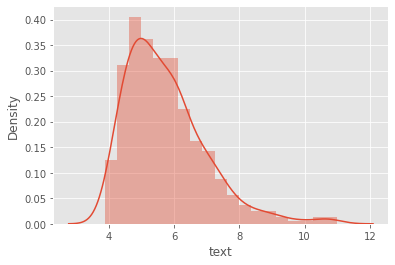

In [51]:
word=tweets_df['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)))

### Palabras comunes

<AxesSubplot:>

c:\Users\juanp\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 128138 (\N{PILL}) missing from current font.
  func(*args, **kwargs)
c:\Users\juanp\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128138 (\N{PILL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


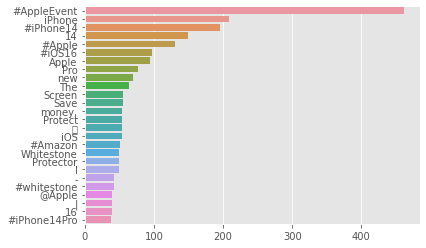

In [52]:
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

### Analisis ngramas

#### Bigrama

In [53]:
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<AxesSubplot:>

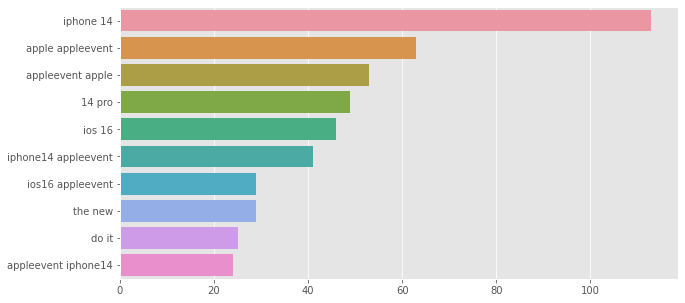

In [54]:
plt.figure(figsize=(10,5))
top_tweet_bigrams=get_top_tweet_bigrams(tweets_df['text'])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

#### Trigrama

In [55]:
def get_top_tweet_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<AxesSubplot:>

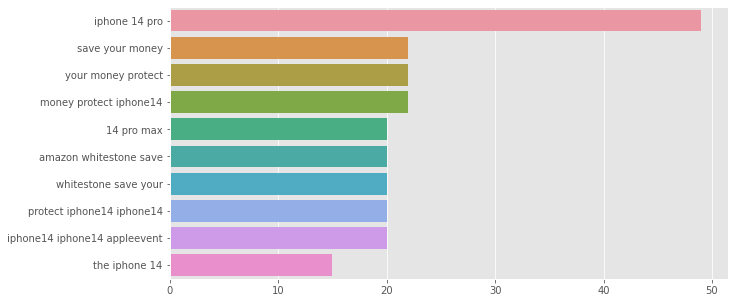

In [56]:
plt.figure(figsize=(10,5))
top_tweet_trigrams=get_top_tweet_trigrams(tweets_df['text'])[:10]
x,y=map(list,zip(*top_tweet_trigrams))
sns.barplot(x=y,y=x)

## Analisis sentimientos

In [57]:
sia = SentimentIntensityAnalyzer()

### Determinacion de valores de positividad, neutralidad, y negatividad

In [58]:
def getScoreText(text):
    scoreObject = sia.polarity_scores(text)
    score = scoreObject['compound']
    return score

In [59]:
tweets_df['score'] = tweets_df['text'].apply(lambda x : getScoreText(x))

### Determinacion de polaridad de acuerdo a los valores

In [60]:
#rangos de score
def setPolarity(score):
    if score < -0.33:
        return 'negative'
    elif score > 0.33:
        return 'positive'
    else:
        return 'neutral'

In [61]:
tweets_df['polarity'] = tweets_df['score'].apply(lambda x : setPolarity(x))

### Tweets mas positivos y negativos

#### 10 mas negativos

In [62]:
tweets_df.sort_values(by=['score']).head(10)

,user_name,user_location,user_description,user_verified,date,text,hashtags,source,score,polarity
112,Gagarin News,,A news platform that aims to popularize the ne...,False,2022-09-14 15:01:00+00:00,Apple’s longawaited presentation took place on...,None,Twitter Web App,-0.7992,negative
307,Victr,"Enugu-Umunze, Nigeria",,False,2022-09-13 23:43:45+00:00,Despite the Bugs and Lag complaints Im still g...,None,Twitter for iPhone,-0.7351,negative
442,BekaDu,,мысли вслух,False,2022-09-13 13:26:37+00:00,the icon that pissed me off\niPhone 13pro ios ...,"[apple, AppleEvent, iOS16, 13pro]",Twitter for iPhone,-0.6369,negative
105,Skyline,,Fashion is ❤️,False,2022-09-14 15:16:37+00:00,iPhone 13 Series Aesthetic Bitch Mode ON Case ...,"[AppleEvent, iPhone14]",Twitter Web App,-0.5859,negative
192,Apple Lobby,Italia,Apple news and rumors. Not affiliated with App...,False,2022-09-14 09:13:22+00:00,Apple has unveiled the new Apple Watch Series ...,None,Twitter for iPhone,-0.5859,negative
160,Digvijay Jawalkar,World is not enough,,False,2022-09-14 12:19:07+00:00,Apple’s iOS 16 feature of undo send iMessage i...,None,Twitter for iPhone,-0.5423,negative
468,taryn antoine,"Lafayette, LA",✞ ♡ | 22 | 1 Peter 5:7 | BLM | LSU alum (@lsus...,False,2022-09-13 12:04:00+00:00,i can edit AND unsend messages now… WE ARE ALL...,[AppleEvent],Twitter for iPhone,-0.5319,negative
482,Anir Chakraborty,Earth,Leaks cannot Hide from me🔥I go to future and b...,False,2022-09-13 10:58:15+00:00,Samsung is trolling Apple🤔\nYet they are suppl...,None,Twitter for Android,-0.5267,negative
90,Tirtharanjan,,,False,2022-09-14 15:46:57+00:00,Android have punch hole or pile shaped cut off...,None,Twitter for Android,-0.5187,negative
126,Seth Berner,,,False,2022-09-14 14:26:00+00:00,If battery life on the iPhone 14 Pro and Pro M...,None,Twitter for iPhone,-0.4767,negative


#### 10 mas positivos

In [72]:
tweets_df.sort_values(by=['score'], ascending=False).head(10)

,user_name,user_location,user_description,user_verified,date,text,hashtags,source,score,polarity
441,Ceddy mane,"Grove City, OH",👾TWITCH STREAMER👾📱Owner of Celladel LLC📱🚛Drive...,False,2022-09-13 13:37:14+00:00,Signup for Webull and get 2 free stocks Make A...,"[Signup, Webull, stocks, deposit, stock, Refer]",Twitter for iPhone,0.9670,positive
203,Mohit Kalra,"Adelaide, Australia",Certified Wireless Network #Trainer | #CWNA |#...,False,2022-09-14 08:07:04+00:00,I’m excited and so grateful for what’s coming ...,[AppleEvent],Twitter for iPhone,0.9636,positive
97,𝙒𝙃𝙄𝙏𝙀𝙎𝙏𝙊𝙉𝙀𝘿𝙊𝙈𝙀_𝙐𝙆,,Best Device Protectors\nDome Glass/EZ Glass/Fi...,False,2022-09-14 15:30:01+00:00,The best Apple iPhone 14 screen protectors di...,None,Buffer,0.9317,positive
131,𝙒𝙃𝙄𝙏𝙀𝙎𝙏𝙊𝙉𝙀𝘿𝙊𝙈𝙀_𝙐𝙆,,Best Device Protectors\nDome Glass/EZ Glass/Fi...,False,2022-09-14 14:11:00+00:00,The best Apple iPhone 14 screen protectors di...,None,Buffer,0.9317,positive
111,𝙒𝙃𝙄𝙏𝙀𝙎𝙏𝙊𝙉𝙀𝘿𝙊𝙈𝙀_𝙐𝙆,,Best Device Protectors\nDome Glass/EZ Glass/Fi...,False,2022-09-14 15:04:00+00:00,The best Apple iPhone 14 screen protectors di...,None,Buffer,0.9317,positive
125,𝙒𝙃𝙄𝙏𝙀𝙎𝙏𝙊𝙉𝙀𝘿𝙊𝙈𝙀_𝙐𝙆,,Best Device Protectors\nDome Glass/EZ Glass/Fi...,False,2022-09-14 14:30:26+00:00,The best Apple iPhone 14 screen protectors di...,None,Buffer,0.9317,positive
29,Hermes Penelope,"Los Angeles, CA",Follow my instagram @hermespenelope 🧡 3 Year O...,False,2022-09-14 20:22:57+00:00,Her favorite song She love singing hermespen...,"[hermespenelope, baby, Babies, babiesoftwitter...",Twitter for iPhone,0.9313,positive
450,Dabithiah_Wealth,"Ilorin, Nigeria",Optimistic,False,2022-09-13 13:07:59+00:00,Best buy from Sphynx \n\nCos SphynxLabs commun...,[Sphynx],Twitter Web App,0.9201,positive
266,Sajib Rayhan2002,Dhaka Bangladesh,I am a professional #GraphicsDesigner. I love ...,False,2022-09-14 03:33:04+00:00,How To Make A Dynamic Invoice In Excel Creati...,None,Twitter Web App,0.9201,positive
172,USA ALL GIFT CARD OFFERS IN ONE,"Virginia, USA","Hi, welcome to our profile! Are you looking fo...",False,2022-09-14 10:44:34+00:00,Scratch Magic Apps Install Emergency And win S...,None,Twitter for Android,0.9186,positive


#### Conteo de tweets en general

In [68]:
tweets_df['score'].value_counts().sort_index()

-0.7992    1
-0.7351    1
-0.6369    1
-0.5859    2
-0.5423    1
          ..
 0.9201    2
 0.9313    1
 0.9317    4
 0.9636    1
 0.9670    1
Name: score, Length: 121, dtype: int64

c:\Users\juanp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='score', ylabel='Density'>

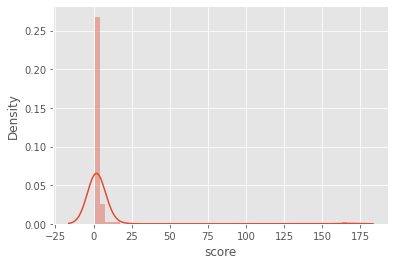

In [69]:
scores=tweets_df['score'].value_counts().sort_index()
sns.distplot(scores)

In [70]:
tweets_df['polarity'].value_counts()

neutral     229
positive    179
negative     19
Name: polarity, dtype: int64

### Conclusiones

El algoritmo toma como negativo el uso de palabras negativas sin tomar en cuenta el contexto. (e.g. ID 166 Tabla de Negativos)
El algoritmo no reconoce el uso del sarcasmo en algunos de los tweets. (e.g. ID 405 Tabla de Negativos)
Los comentarios positivos tienen un mejor resultado con el analisis de sentimientos.
Los comentarios positivos tienen mayor volumen ya que existen bots que repiten el mismo tweet etiquetando a distintas personas en cada tweet.